## Aproksymacja 

Jako źródło danych proszę wykorzystać te same funkcje i te same zbiory danych jakie były używane w ćwiczeniach dotyczących interpolacji. 
Dodatkowo jako dodatkowe źródło danych proszę wykorzystać publicznie dostępne dane o koronawirusie (active cases):
https://github.com/CSSEGISandData/COVID-19 
Kraj proszę wybrać samodzielnie. Celem tego zadania będzie więc określenie funkcji nalepiej przybliżającej wzrost zachorowań. 

### Zadanie 1 Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 

In [1]:
import math
import numpy as np
import sympy as sp
from tabulate import tabulate
import matplotlib.pyplot as plt


def get_table(min, max, number_of_points, func, func_name):
    step = (max - min) / number_of_points
    table = []
    x_values = []
    y_values = []
    for i in np.arange(min, max + step, step):
        table.append([i, func(i)])
        x_values.append(i)
        y_values.append(func(i))
    return x_values, y_values, tabulate(table, headers=["x", func_name],
                                        tablefmt="grid", floatfmt=".10f")


def draw_diagram(min, max, number_of_points, fun1, fun2, fun_name, rel_errors, abs_errors, degree):
    x_axis = []
    f1_values = []
    f2_values = []
    step = (max - min) / number_of_points
    for x in np.arange(min, max+step, step):
        x_axis.append(x)
        f1_values.append(fun1(x))
        f2_values.append(fun2(x))
        if fun1(x) == 0:
            rel_errors.append(abs(fun2(x) - fun1(x)))
        else:
            rel_errors.append(abs(fun2(x) - fun1(x)) / fun1(x))
        abs_errors.append(abs(fun2(x) - fun1(x)))

    plt.plot(x_axis, f1_values, label=fun_name)
    plt.plot(x_axis, f2_values, label="Approximation of " + fun_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Least squares polynomial approximation of " + fun_name + ", degree: " + str(degree))
    plt.legend()
    plt.show()


def least_square_polynomial_approximation_calculations(x_array, y_array, m):
    n = len(x_array)
    g_array = [0] * (2 * m + 1)

    for i in range(2 * m + 1):
        sum = 0
        for j in range(n):
            sum += pow(x_array[j], i)
        g_array[i] = sum

    b_array = np.zeros(m + 1)

    for i in range(m + 1):
        sum = 0
        for j in range(n):
            sum += (pow(x_array[j], i) * y_array[j])
        b_array[i] = sum

    g_matrix = np.zeros((m + 1, m + 1))

    for i in range(m + 1):
        for j in range(m + 1):
            g_matrix[i][j] = g_array[i + j]

    a_array = np.linalg.solve(g_matrix, b_array)

    polynomial = 0
    X = sp.symbols('x')
    for i in range(m + 1):
        polynomial += pow(X, i) * a_array[i]

    return sp.simplify(polynomial)


def calculate(p, x):
    s = sp.symbols("x")
    return p.evalf(subs={s: x})


def cmp_err(rel_errors, abs_errors):
    tab = [["Mean of relative errors [%]", float(sum(rel_errors) / len(rel_errors)) * 100],
               ["Mean of absolute errors", float(sum(abs_errors) / len(abs_errors))]]
    print(tabulate(tab, headers=["Type", "General error"], tablefmt="grid", floatfmt=".10f"), "\n")


def least_square_polynomial_approximation(min, max, number_of_points, n):
    sqrt_x_arr, sqrt_y_arr, sqrt_x_y = get_table(min, max, number_of_points, math.sqrt, "sqrt(x)")
    sin_x_arr, sin_y_arr, sin_x_y = get_table(min, max, number_of_points, math.sin, "sin(x)")
    f = lambda x: x ** 3 + 2 * x
    f_x_arr, f_y_arr, f_x_y = get_table(min, max, number_of_points, f, "x^3 + 2x")

    for i in range(1, n + 1):
        sqrt_lspa = least_square_polynomial_approximation_calculations(sqrt_x_arr, sqrt_y_arr, i)
        sin_lspa = least_square_polynomial_approximation_calculations(sin_x_arr, sin_y_arr, i)
        f_lspa = least_square_polynomial_approximation_calculations(f_x_arr, f_y_arr, i)

        sqrt_approx = lambda x: calculate(sqrt_lspa, x)
        sin_approx = lambda x: calculate(sin_lspa, x)
        f_approx = lambda x: calculate(f_lspa, x)

        rel_errors = []
        abs_errors = []
        draw_diagram(min, max, 100, math.sqrt, sqrt_approx, "sqrt(x)", rel_errors, abs_errors, i)
        cmp_err(rel_errors, abs_errors)

        rel_errors = []
        abs_errors = []
        draw_diagram(min, max, 100, math.sin, sin_approx, "sin(x)", rel_errors, abs_errors, i)
        cmp_err(rel_errors, abs_errors)

        rel_errors = []
        abs_errors = []
        draw_diagram(min, max, 100, f, f_approx, "x^3 + 2x", rel_errors, abs_errors, i)
        cmp_err(rel_errors, abs_errors)

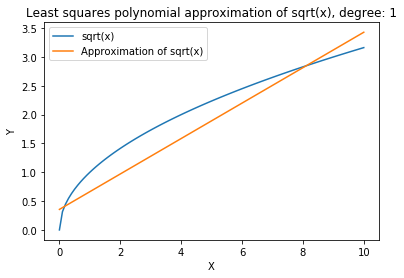

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   16.1621157445 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2698747206 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   61.1023830777 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.6313403390 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 1976.8470640151 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  126.159491749

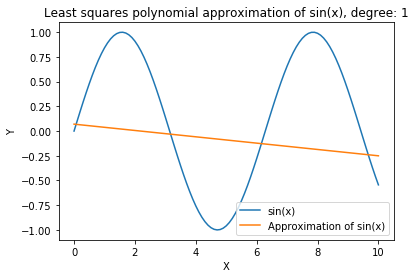

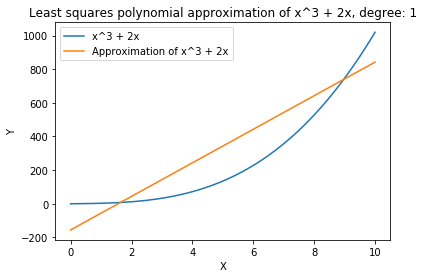

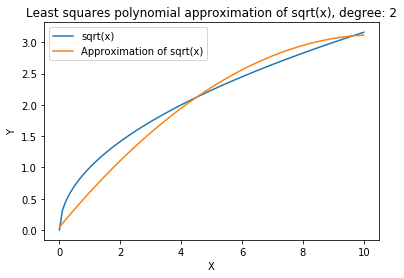

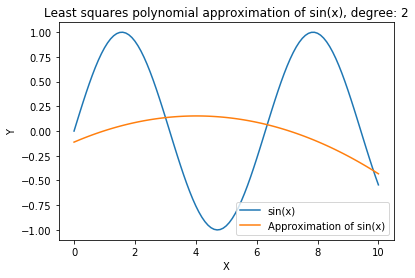

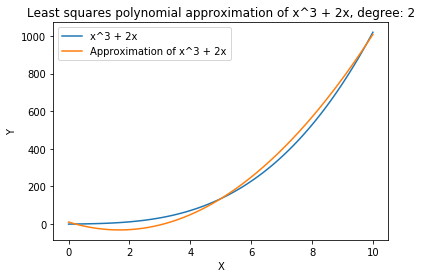

In [2]:
least_square_polynomial_approximation(0,10,3,2)

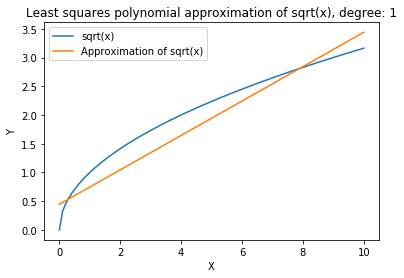

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   13.7181370448 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2311885603 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   31.9051244762 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.6052065878 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 2171.5439198084 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  116.842217821

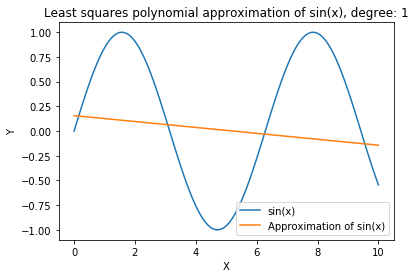

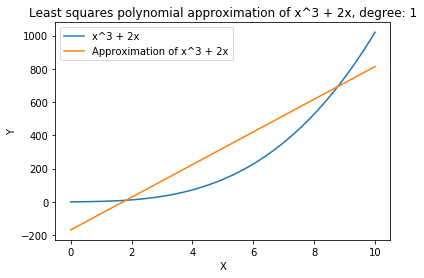

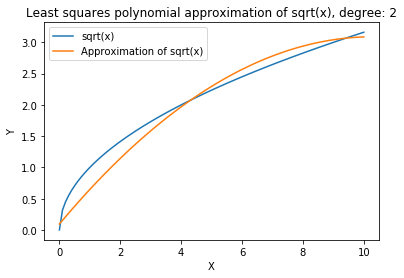

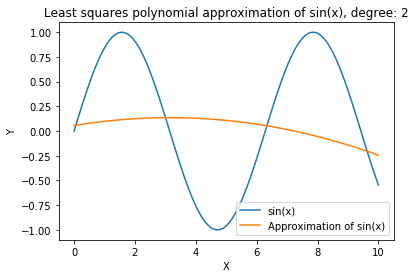

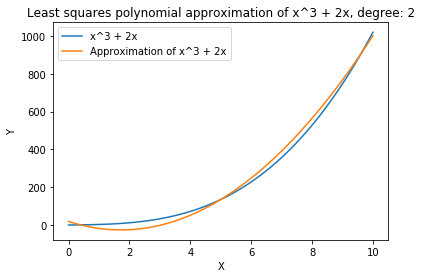

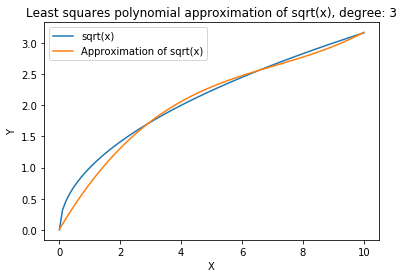

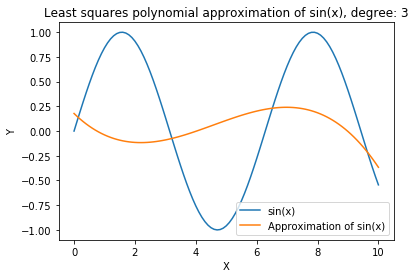

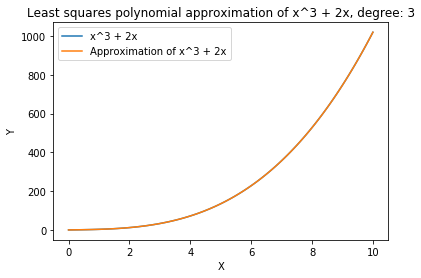

In [3]:
least_square_polynomial_approximation(0,10,4,3)

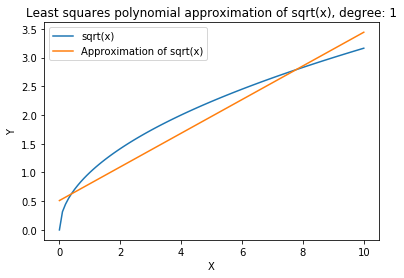

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   12.3628285583 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.2069361012 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] |   18.8785629632 |
+-----------------------------+-----------------+
| Mean of absolute errors     |    0.5947249745 |
+-----------------------------+-----------------+ 

+-----------------------------+-----------------+
| Type                        |   General error |
+=============================+=================+
| Mean of relative errors [%] | 2282.0061653995 |
+-----------------------------+-----------------+
| Mean of absolute errors     |  111.995821782

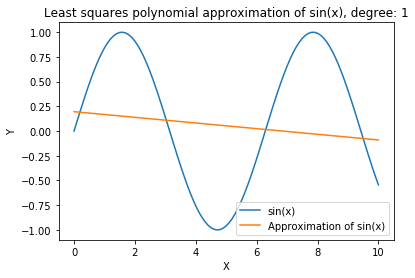

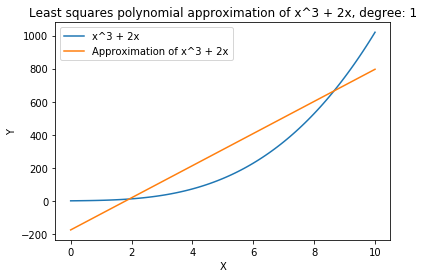

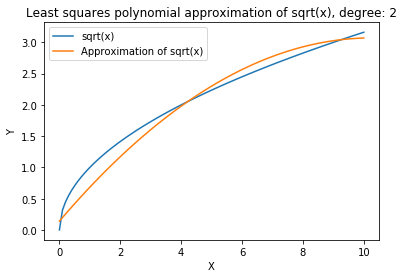

In [ ]:
least_square_polynomial_approximation(0,10,5,4)

In [ ]:
least_square_polynomial_approximation(0,10,8,7)

In [ ]:
least_square_polynomial_approximation(0,10,15,14)

##### Zadanie 1a (dla chętnych)
Proszę zwrócić uwagę na dane wygenerowane przez funkcję trygonometryczną i wynik ich aproksymacji. Proszę spróbować zastosować aproksymację środniokwadratową funkcjami trygonometrycznymi. 




### Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python. 

In [ ]:
dates = ["3/2/20","3/3/20","3/4/20","3/5/20","3/6/20","3/7/20","3/8/20","3/9/20","3/10/20","3/11/20",
         "3/12/20","3/13/20", "3/14/20","3/15/20","3/16/20","3/17/20","3/18/20","3/19/20","3/20/20","3/21/20",
         "3/22/20","3/23/20","3/24/20","3/25/20","3/26/20","3/27/20","3/28/20","3/29/20","3/30/20", "3/31/20",
         "4/1/20","4/2/20", "4/3/20","4/4/20","4/5/20","4/6/20","4/7/20"
         ]
infected = [100,124,158,221,319,435,541,704,994,1301,
            1630,2183,2770,3613,4596,6344,9197,13779,19367,24192,
            33592,43781,54856,68211,85435,104126,123578,143491,163788,188530,
            215003,244877,277161,311357,336673,367004,400335
            ]
def compare_results(domain, values_original, values_approx, function_name, relative_error, absolute_error):

    for i in range(len(domain)):
      absolute_error.append(abs(values_original[i] - values_approx[i]))
      if values_original[i] == 0:
        relative_error.append(np.nan)
      else:
        relative_error.append(absolute_error[i] / values_original[i])
    print(tabulate({"x": domain, function_name: values_original, function_name + " interpolation": values_approx, 
                  "realtive error": relative_error, "absolute error": absolute_error}, headers="keys", floatfmt=".10f"), "\n\n")
    
def covid_approx_numpy(dates, infected, m):
  approx = np.polyfit(np.linspace(1, len(dates), len(dates)), infected, m)
  approx_values = np.polyval(approx, np.linspace(1, len(dates), len(dates)))
  relative_error = []
  absolute_error = []
  compare_results(dates, infected, approx_values, "infections", relative_error, absolute_error)

  plt.title(f'Least Square Polynomial Approximation degree of {m}')
  plt.plot(dates, approx_values, 'ro', label="Approximation", )
  plt.plot(dates, infected, label="Number of infections in USA")
  plt.grid(True, which='both')
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.xticks(rotation=90)
  plt.legend()
  plt.show()

In [ ]:
covid_approx_numpy(dates, infected, 1)

In [ ]:
covid_approx_numpy(dates, infected, 2)

In [ ]:
covid_approx_numpy(dates, infected, 3)

In [ ]:
covid_approx_numpy(dates, infected, 4)

In [ ]:
covid_approx_numpy(dates, infected, 5)

In [ ]:
covid_approx_numpy(dates, infected, 6)

In [ ]:
covid_approx_numpy(dates, infected, 12)

In [ ]:
covid_approx_numpy(dates, infected, 18)

In [ ]:
covid_approx_numpy(dates, infected, 24)

